In [3]:
#Only using numpy ,pandas and seaborn for visualization
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
#Link to dataset : http://archive.ics.uci.edu/ml/datasets/iris

cols=["sepal length in cm","sepal width in cm","petal length in cm","petal width in cm","class"]
df=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/bezdekIris.data",names=cols)
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#Give the dataset a good shuffle
df=df.sample(frac=1)
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
145,6.7,3.0,5.2,2.3,Iris-virginica
43,5.0,3.5,1.6,0.6,Iris-setosa
107,7.3,2.9,6.3,1.8,Iris-virginica
117,7.7,3.8,6.7,2.2,Iris-virginica
13,4.3,3.0,1.1,0.1,Iris-setosa


In [6]:
#Lets Split the data 
def train_test_split(X,y,test_frac=0.25):
    X=X.values
    y=y.values
    X_train = X[:-int(len(X)*test_frac)]
    X_test =  X[int(len(X)*test_frac):]
    y_train = y[:-int(len(y)*test_frac)]
    y_test =  y[int(len(y)*test_frac):]
    return X_train,X_test,y_train,y_test


In [44]:
# Initially Lets consider only 2 features for classification
# Features -> sepal length and petal length
X_train,X_test,y_train,y_test=train_test_split(df[["sepal length in cm","petal length in cm"]],df['class'])

In [26]:
#Visualizing the data

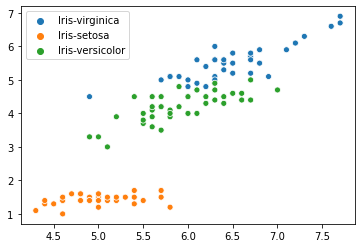

In [27]:
sns.scatterplot(x=X_train[:,0],y=X_train[:,1],hue=y_train)

In [28]:
# Lets define a distance function to calculate the distance between a feature point and test_sample
t1,t2=X_train[:2]

In [29]:
t1 #Say our feature point

array([6.7, 5.2, 3. ])

In [30]:
t2 #Say out target_sample point

array([5. , 1.6, 3.5])

In [31]:
#Calculating Euclidian Distance

In [32]:
import math

In [33]:
math.sqrt( (t2[0]-t1[0])**2 + (t2[1]-t1[1])**2 )

3.981205847478877

In [34]:
#If we had 3 features we need to do sqrt( sum( (x2-x1)**2 , (y2-y1)**2 , (z2-z1)**2 ) )
# Not so scalable if we need to keep rewriting the formula for each case ,
# hence we use numpy linalg.norm() which does the same thing but faster and for any no of dimensions

In [35]:
def get_euclidian_distance(p1,p2):
    """
    Input : 
        p1,p2 : Two points between which the distance is requried
        
    Returns : Euclidian distance. 
        i.e : The square-root of sum of squared difference of each dimension
        
    """
    return np.linalg.norm(p1-p2)


In [36]:
#We get the same result as before so we are good to proceed
get_euclidian_distance(t1,t2)

4.012480529547776

In [115]:
from collections import Counter
def KNN(data,test_case,k=5):
    """
    data = data to train the classifier. expected a list of n elements where first (n-1) are features and last is class 
    test_case = features to predict a target label for
    k = no of neighbours to use for calculating the distance
    
    Returns:
        the class of the target label
    """
    
    #distance
    distances=[]
    labels=[]

    for row in data:
        #Each row of the data will contain the features and target class
        features=row[:-1]
        class_label=row[-1]
        #First lets calculate the distance between the feature and test_case 
        dist=get_euclidian_distance(features,test_case)
        #print(dist)
        distances.append((dist,class_label))
    
    
        for i in sorted(distances)[:k] :
            labels.append(i[1]) 

    res=Counter(labels).most_common()[0][0]
    
    #res must only be a counter for the below to work
    #acc=[]
    #Calculating percentage on each class 
    #for r in res:
    #    acc.append((r,res[r]/sum(res.values())))
    
    return res #acc

In [116]:
#data=df[['sepal length in cm','petal length in cm','class']].values
data=np.hstack((X_train,y_train.reshape(len(X_train),1)))

In [121]:
res=KNN(data,[5,3],3)

In [122]:
res

'Iris-versicolor'

In [127]:
score=0
for x,y in zip(X_test,y_test):
    #print(x)
    if KNN(data,x)==y:
        score+=1

In [128]:
test_acc=score/len(X_test)
test_acc

0.9557522123893806

In [129]:
# now we can use all the four feature columns and see how it performs

In [130]:
X_train,X_test,y_train,y_test=train_test_split(df.drop('class',axis=1),df['class'])

In [131]:
data=np.hstack((X_train,y_train.reshape(len(X_train),1)))

In [133]:
score=0
for x,y in zip(X_test,y_test):
    #print(x)
    if KNN(data,x)==y:
        score+=1
test_acc=score/len(X_test)
test_acc

0.9734513274336283

## END